#### Import the Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Read the dataset

In [4]:
df = pd.read_csv('TaxiFare.csv',parse_dates=[2])
df.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [5]:
df.dtypes
# df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [6]:
df.shape

(50000, 8)

### Data Preprocessing

#### 1) Handling Null Values

In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### 2) Handling Duplicates Values

In [8]:
df.duplicated().sum()

0

#### 3) Check data types

In [9]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [10]:
df.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  50000.000000         50000.000000        50000.000000   
mean      11.364171           -72.509756           39.933759   
std        9.685557            10.393860            6.224857   
min       -5.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734880   
50%        8.500000           -73.981840           40.752678   
75%       12.500000           -73.967148           40.767360   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
count          50000.000000         50000.000000     50000.000000  
mean             -72.504616            39.926251         1.667840  
std               10.407570             6.014737         1.289195  
min              -84.654241           -74.006377         0.000000  
25%              -73.991152            40.734372         1.000000  
50%              -73.980082            40.753372         1.000000  
75%              -73.963584            40.768167         2.000000  
max               40.851027            43.415190         6.000000

#### Chcek the target Variable

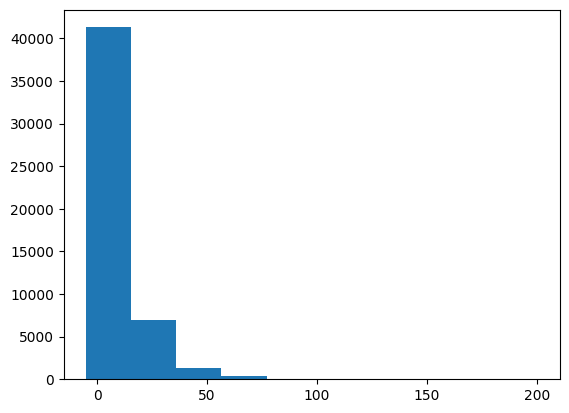

In [11]:
plt.hist(df['amount'])
plt.show()

In [12]:
df[df['amount']<=0].shape

(9, 8)

In [13]:
df1 = df.copy()

In [14]:
df = df[df['amount']>0]
print(df.shape)

(49991, 8)


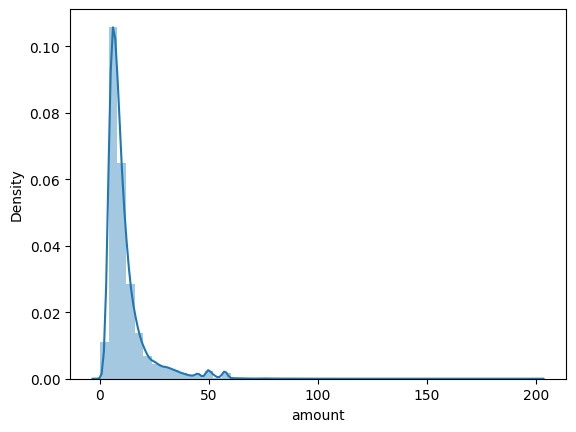

In [15]:
sns.distplot(df['amount'])
plt.show()

In [16]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

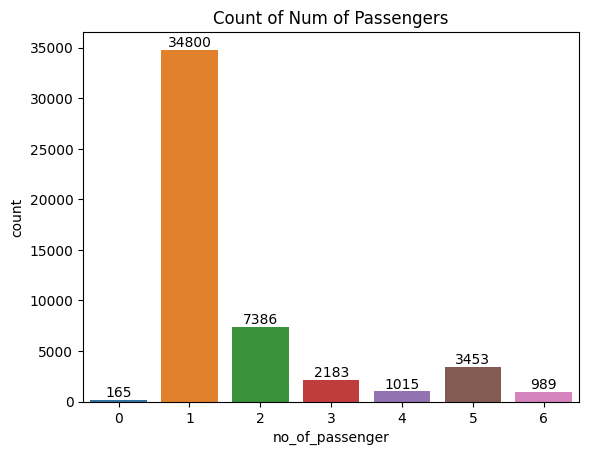

In [17]:
ax = sns.countplot(x=df['no_of_passenger'])
ax.bar_label(ax.containers[0])
plt.title('Count of Num of Passengers')
plt.show()

In [18]:
(165/499991)*100

0.03300059401069219

In [19]:
df = df[df['no_of_passenger']!=0]
df.shape

(49826, 8)

In [20]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

#### Rename the columns

In [21]:
df.columns = ['id','amount','pickup_datetime',
              'long_pickup','lat_pickup','long_drop','lat_drop','pass_count']
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count'],
      dtype='object')

#### Note
1) Latitude ranges from -90 to 90.<br>
2) Longitude ranges from -180 to 180.

In [22]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count'],
      dtype='object')

In [23]:
print(df[~df['lat_pickup'].between(-90,90)].shape)
print(df[~df['lat_drop'].between(-90,90)].shape)

(1, 8)
(0, 8)


In [24]:
print(df[~df['long_pickup'].between(-180,180)].shape)
print(df[~df['long_drop'].between(-180,180)].shape)

(0, 8)
(0, 8)


In [25]:
df = df[(df['lat_pickup']>=-90) & (df['lat_pickup']<=90)]
df.shape

(49825, 8)

In [26]:
df.describe()

amount   long_pickup    lat_pickup     long_drop      lat_drop  \
count  49825.000000  49825.000000  49825.000000  49825.000000  49825.000000   
mean      11.373212    -72.510557     39.926937    -72.506896     39.927448   
std        9.693602     10.391455      6.011390     10.400148      6.011808   
min        0.010000    -75.423848    -74.006893    -84.654241    -74.006377   
25%        6.000000    -73.992066     40.734890    -73.991151     40.734378   
50%        8.500000    -73.981838     40.752685    -73.980087     40.753375   
75%       12.500000    -73.967145     40.767363    -73.963620     40.768162   
max      200.000000     40.783472     43.098708     40.851027     43.415190   

         pass_count  
count  49825.000000  
mean       1.673437  
std        1.287799  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        6.000000

#### Compute Distance between Pickup and Drop Location

#### Distance Formula
Minkowski Distance(A(x1,y1),B(x2,y2))  = ( (|x2-x1|)^p + (|y2-y1|)^p ) ^(1/p), p is an int

Manhattan Distance(A(x1,y1),B(x2,y2))  =  |x2-x1| + |y2-y1|

Euclidean Distance(A(x1,y1),B(x2,y2))  =  sqrt((x2-x1)^2 + (y2-y1)^2)

In [27]:
def minkowski_dist(x1,x2,y1,y2,p):
    dist = (abs(x2-x1)**p + abs(y2-y1)**p)**(1/p)
    return dist

In [28]:
df['Manhattan_dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                      df['long_pickup'],df['long_drop'],1)
df['Euclidean_dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                      df['long_pickup'],df['long_drop'],2)
df.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  
0 -73.841610  40.712278           1        0.011742        0.009436  
1 -73.979268  40.782004           1        0.107481        0.079696  
2 -73.991242  40.750562           2        0.019212        0.013674  
3 -73.991567  40.758092           1        0.029386        0.025340  
4 -73.956655  40.783762           1        0.027194        0.019470

In [29]:
df['abs_lat_diff'] = abs(df['lat_pickup'] - df['lat_drop'])
df['abs_long_diff'] = abs(df['long_pickup'] - df['long_drop'])
df.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   
3 -73.991567  40.758092           1        0.029386        0.025340   
4 -73.956655  40.783762           1        0.027194        0.019470   

   abs_lat_diff  abs_long_diff  
0      0.009041       0.002701  
1      0.070701       0.036780  
2      0.010708       0.008504  
3      0.024949       0.004437  
4      0.015754       0.011440

#### Haversine Distance

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formula boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).
Latitude and longitude are measured in radians

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance


#### Link to havesine 
https://pypi.org/project/haversine/

In [39]:
def haversine_dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
    km = 6378 * c
    return km

In [40]:
df['Haversine_dist'] = haversine_dist(df['long_pickup'],df['lat_pickup'],
                                     df['long_drop'],df['lat_drop'])
df.head(3)

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   

   abs_lat_diff  abs_long_diff  Haversine_dist  
0      0.009041       0.002701        1.031896  
1      0.070701       0.036780        8.459416  
2      0.010708       0.008504        1.391052

#### Generating Year, Quarter, Month, Day of Pickup

In [41]:
df['Year'] = df['pickup_datetime'].dt.year
df['Qtr'] = df['pickup_datetime'].dt.quarter
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   
3 -73.991567  40.758092           1        0.029386        0.025340   
4 -73.956655  40.783762           1        0.027194        0.019470   

   abs_lat_diff  abs_long_diff  Haversine_dist  Year  Qtr  Month  Day  
0      0.009041       0.002701        1.031896  2009    2      6   15  
1      0.070701       0.036780        8.459416  2010    1      1    5  
2      0.010708       0.008504        1.391052  2011    3      8   18  
3      0.024949       0.004437        2.802346  2012    2      4   21  
4      0.015754       0.011440        2.001353  2010    1      3    9

In [42]:
df['Hour'] = df['pickup_datetime'].dt.hour
df.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   
3 -73.991567  40.758092           1        0.029386        0.025340   
4 -73.956655  40.783762           1        0.027194        0.019470   

   abs_lat_diff  abs_long_diff  Haversine_dist  Year  Qtr  Month  Day  Hour  
0      0.009041       0.002701        1.031896  2009    2      6   15    17  
1      0.070701       0.036780        8.459416  2010    1      1    5    16  
2      0.010708       0.008504        1.391052  2011    3      8   18     0  
3      0.024949       0.004437        2.802346  2012    2      4   21     4  
4      0.015754       0.011440        2.001353  2010    1      3    9     7

In [43]:
df['Hour'].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5], dtype=int64)

In [44]:
def hour_quarter(x):
    if x>0 and x<=6:
        return 1     # ' Late Night or Early_Morning'
    elif x>6 and x<=12:
        return 2    # 'Morning'
    elif x>12 and x<=18:
        return 3    # "Afternoon/Evening"
    else:
        return 4    # "Late Afternoon or Night"

In [45]:
df['Hour_Qtr'] = df['Hour'].apply(hour_quarter)

In [46]:
df['Hour_Qtr'].value_counts()

4    15910
3    14858
2    13521
1     5536
Name: Hour_Qtr, dtype: int64

In [47]:
# is_weekday = (weekday=1,weekend=0)
# is_weekend = (weekday=0,weekend=1)

In [49]:
df['Is_Weekend'] = np.where(df['pickup_datetime'].dt.dayofweek.isin([5,6]),1,0)
df.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   
3 -73.991567  40.758092           1        0.029386        0.025340   
4 -73.956655  40.783762           1        0.027194        0.019470   

   abs_lat_diff  abs_long_diff  Haversine_dist  Year  Qtr  Month  Day  Hour  \
0      0.009041       0.002701        1.031896  2009    2      6   15    17   
1      0.070701       0.036780        8.459416  2010    1      1    5    16   
2      0.010708       0.008504        1.391052  2011    3      8   18     0   
3      0.024949       0.004437        2.802346  2012    2      4   21     4   
4      0.015754       0.011440        2.001353  2010    1      3    9     7   

   Hour_Qtr  Is_Weekend  
0         3           0  
1         3           0  
2         4           0  
3         1           1  
4         2           0

In [50]:
df.shape

(49825, 20)

In [51]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count', 'Manhattan_dist',
       'Euclidean_dist', 'abs_lat_diff', 'abs_long_diff', 'Haversine_dist',
       'Year', 'Qtr', 'Month', 'Day', 'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')

In [52]:
df.isnull().sum()

id                 0
amount             0
pickup_datetime    0
long_pickup        0
lat_pickup         0
long_drop          0
lat_drop           0
pass_count         0
Manhattan_dist     0
Euclidean_dist     0
abs_lat_diff       0
abs_long_diff      0
Haversine_dist     0
Year               0
Qtr                0
Month              0
Day                0
Hour               0
Hour_Qtr           0
Is_Weekend         0
dtype: int64

### EDA

In [53]:
df.groupby(['Year'])['amount'].agg(['min','max','mean','median','var','std'])

min     max       mean  median         var        std
Year                                                        
2009  2.50  165.00  10.049168     7.7   71.353437   8.447096
2010  2.50  143.00  10.141539     7.7   70.639480   8.404730
2011  2.50   96.00  10.481042     7.7   72.116932   8.492169
2012  2.50  200.00  11.244782     8.5   93.934069   9.691959
2013  2.50  180.00  12.443361     9.5  108.729506  10.427344
2014  2.50  165.00  13.140996     9.5  127.952862  11.311625
2015  0.01   96.25  13.076379     9.5  116.383551  10.788121

In [54]:
def feature_desc_wrt_amount(feat):
    feat_desc = df.groupby([feat])['amount'].agg(['min','max','mean','median','count'])
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=df[feat],
                  order=df[feat].value_counts().sort_values(ascending=False).index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {feat}')
    plt.xticks(fontsize=8)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[feat],y=df['amount'])
    plt.title(f'Boxplot for Amount wrt {feat}')
    return feat_desc 

min     max       mean  median  count
Year                                        
2009  2.50  165.00  10.049168     7.7   7716
2010  2.50  143.00  10.141539     7.7   7643
2011  2.50   96.00  10.481042     7.7   7729
2012  2.50  200.00  11.244782     8.5   7944
2013  2.50  180.00  12.443361     9.5   7817
2014  2.50  165.00  13.140996     9.5   7529
2015  0.01   96.25  13.076379     9.5   3447

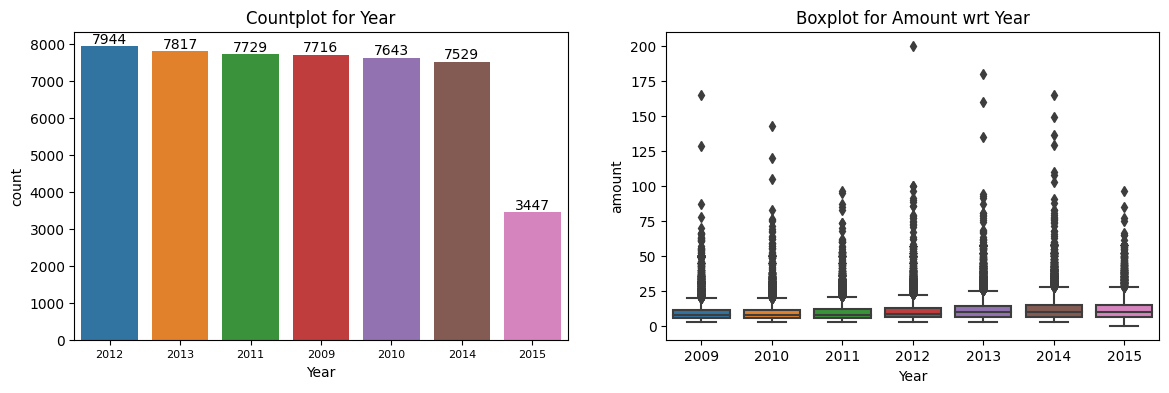

In [55]:
year_desc = feature_desc_wrt_amount('Year')
year_desc

min    max       mean  median  count
Qtr                                       
1    2.50  200.0  10.920603     8.1  13452
2    0.01  160.0  11.557994     8.5  13603
3    2.50  165.0  11.426571     8.5  10979
4    2.50  165.0  11.626716     8.5  11791

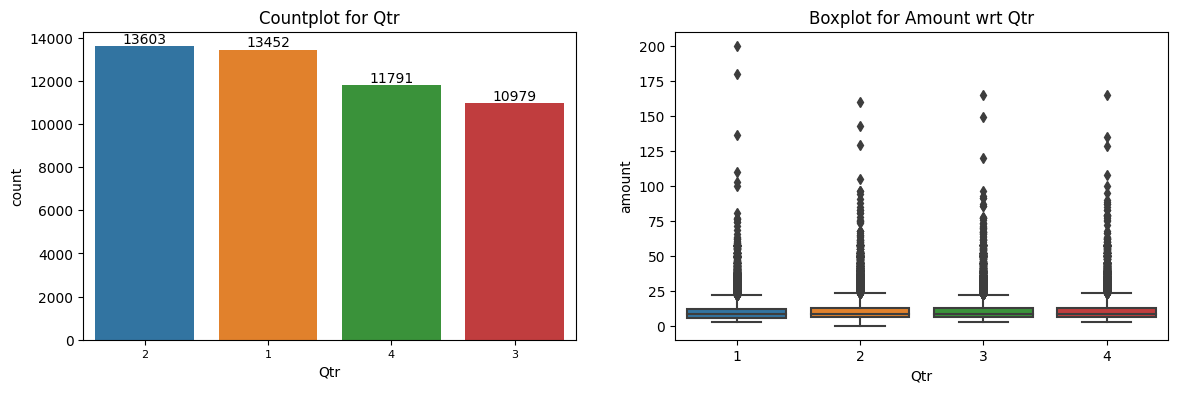

In [56]:
qtr_desc = feature_desc_wrt_amount('Qtr')
qtr_desc

min     max       mean  median  count
Month                                        
1      2.50  180.00  10.702835     8.0   4525
2      2.50  200.00  10.940168     8.1   4282
3      2.50   80.50  11.114708     8.1   4645
4      2.50   93.75  11.330644     8.5   4501
5      0.01  160.00  11.876678     8.9   4597
6      2.50   96.25  11.459949     8.5   4505
7      2.50  120.00  10.947730     8.1   3643
8      2.50  165.00  11.332315     8.5   3533
9      2.50   96.00  11.972829     8.9   3803
10     2.50  100.00  11.577065     8.5   4038
11     2.50  165.00  11.630035     8.5   3752
12     2.50  135.00  11.673714     8.5   4001

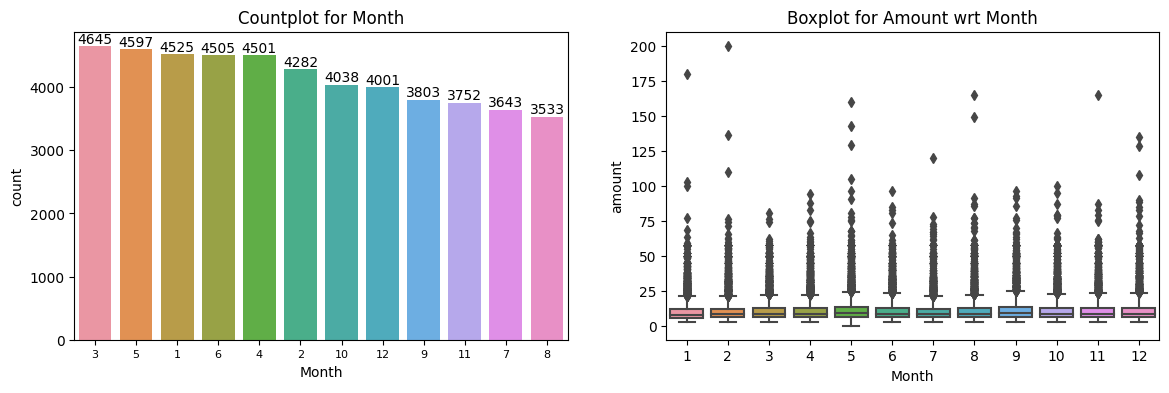

In [57]:
mon_desc = feature_desc_wrt_amount('Month')
mon_desc

min     max       mean  median  count
Day                                        
1    0.01  165.00  11.297063     8.5   1522
2    2.50   61.10  10.944016     8.5   1611
3    2.50  128.61  11.340560     8.1   1572
4    2.50   90.50  11.246569     8.1   1498
5    2.50   96.25  11.529210     8.5   1594
6    2.50   78.60  11.319050     8.5   1664
7    2.50  165.00  11.684889     8.5   1706
8    2.50   75.00  11.529883     8.5   1709
9    2.50  143.00  11.399481     8.1   1675
10   2.50   92.49  11.298455     8.5   1689
11   2.50   84.50  11.510939     8.5   1608
12   2.50  108.00  11.555302     8.5   1739
13   2.50  160.00  11.355132     8.5   1736
14   2.50  149.00  11.284471     8.5   1673
15   2.50   86.75  11.341820     8.5   1709
16   2.50  180.00  11.217534     8.1   1768
17   2.50  120.00  11.718281     8.5   1658
18   2.50   82.50  11.431375     8.5   1665
19   2.50   75.33  11.612869     8.5   1701
20   2.50   66.30  11.680536     8.5   1605
21   2.50   85.50  11.562043     8.5   1738
22   2.50  136.00  11.093343     8.1   1678
23   2.50   68.00  11.230203     8.5   1671
24   2.50   89.90  11.224626     8.1   1604
25   2.50   88.00  11.254415     8.5   1599
26   2.50  200.00  11.172938     8.1   1542
27   2.50  103.00  11.505854     8.1   1510
28   2.50   93.75  11.468282     8.5   1647
29   2.50   59.50  11.118317     8.5   1402
30   2.50   91.00  11.061985     8.1   1436
31   2.50  100.00  11.527545     8.9    896

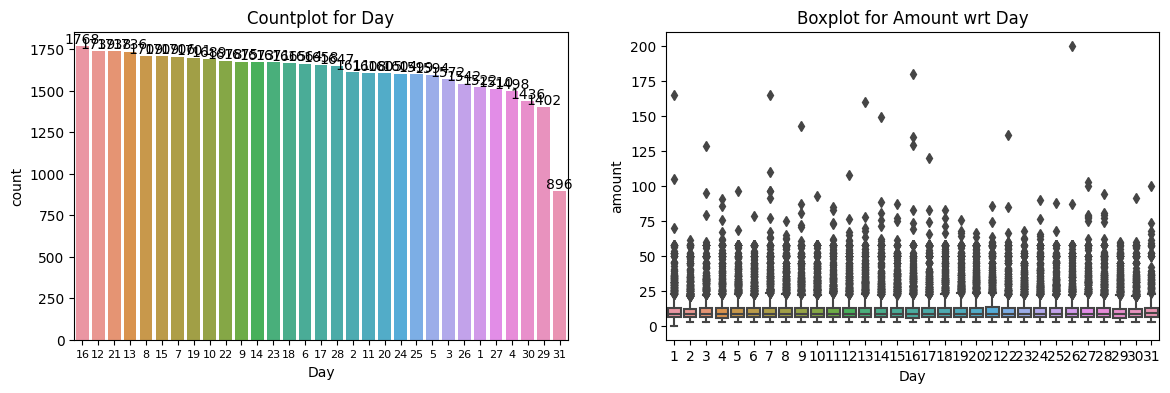

In [58]:
day_desc = feature_desc_wrt_amount('Day')
day_desc

min     max       mean  median  count
Hour                                        
0     2.50   88.25  11.925651     9.3   1888
1     2.50  128.83  11.725847     9.0   1481
2     2.50  136.00  11.253579     8.9   1084
3     2.50  200.00  12.082432     8.9    843
4     2.50   80.35  13.748651    10.0    608
5     2.50   82.50  15.407743     9.3    505
6     2.50   78.50  12.286443     7.7   1015
7     2.50   87.00  11.129984     8.0   1896
8     2.50   95.00  10.624627     8.1   2200
9     2.50   79.00  10.554107     8.1   2369
10    2.50  135.00  10.869494     8.1   2251
11    2.50  160.00  11.110252     8.5   2345
12    2.50   89.90  11.274829     8.5   2460
13    2.50   93.75  11.636844     8.5   2462
14    2.50   88.00  12.102123     8.5   2464
15    0.01  104.67  12.085652     8.5   2346
16    2.50   82.50  12.253242     8.1   2036
17    2.50  120.00  11.340129     8.5   2483
18    2.50  143.00  11.159804     8.5   3067
19    2.50   92.49  10.742921     8.1   3108
20    2.50  180.00  10.744142     8.1   2854
21    2.50  165.00  11.071276     8.5   2806
22    2.50   85.00  11.047302     8.5   2798
23    2.50  128.61  11.349116     8.5   2456

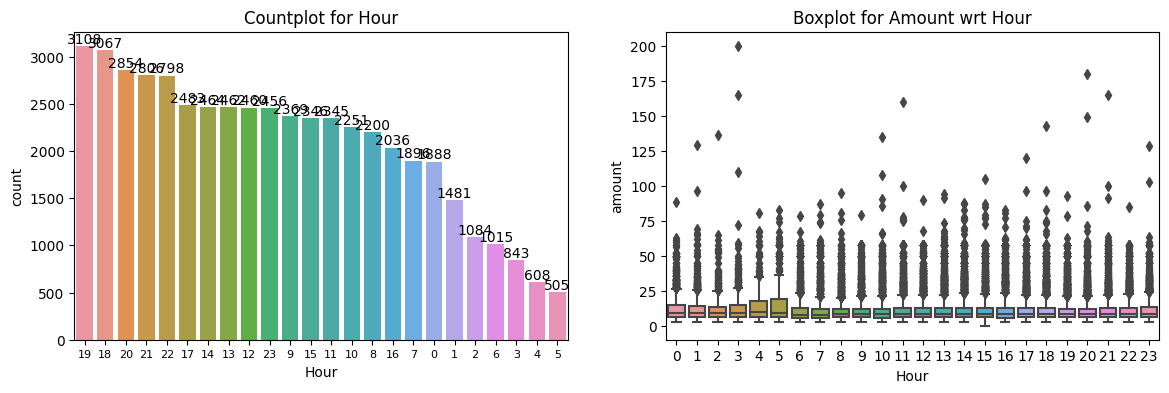

In [59]:
hr_desc = feature_desc_wrt_amount('Hour')
hr_desc

min    max       mean  median  count
Is_Weekend                                       
0           0.01  180.0  11.390267     8.5  35722
1           2.50  200.0  11.330013     8.5  14103

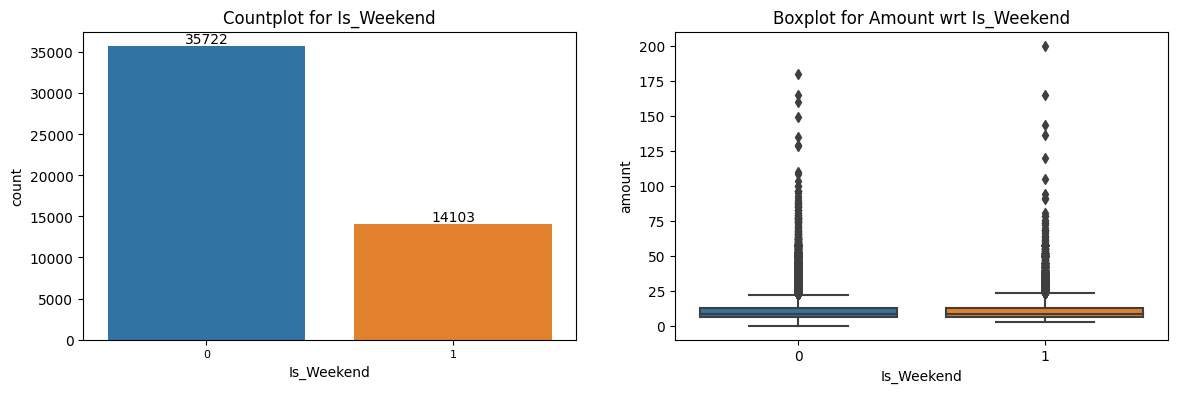

In [60]:
weekend_desc = feature_desc_wrt_amount('Is_Weekend')
weekend_desc

min    max       mean  median  count
Hour_Qtr                                       
1         2.50  200.0  12.348479     8.9   5536
2         2.50  160.0  10.926423     8.1  13521
3         0.01  143.0  11.721277     8.5  14858
4         2.50  180.0  11.088510     8.5  15910

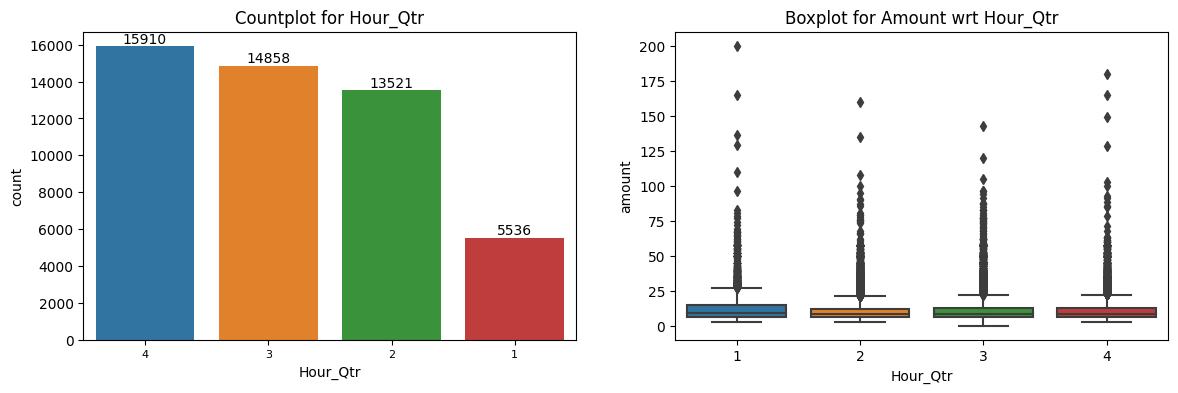

In [61]:
hr_qtr_desc = feature_desc_wrt_amount('Hour_Qtr')
hr_qtr_desc

In [62]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count', 'Manhattan_dist',
       'Euclidean_dist', 'abs_lat_diff', 'abs_long_diff', 'Haversine_dist',
       'Year', 'Qtr', 'Month', 'Day', 'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')

In [63]:
from scipy.stats import jarque_bera

In [64]:
test_stat, p = jarque_bera(df['amount'])
print(p)
# p>0.05 => data is normally dist

0.0


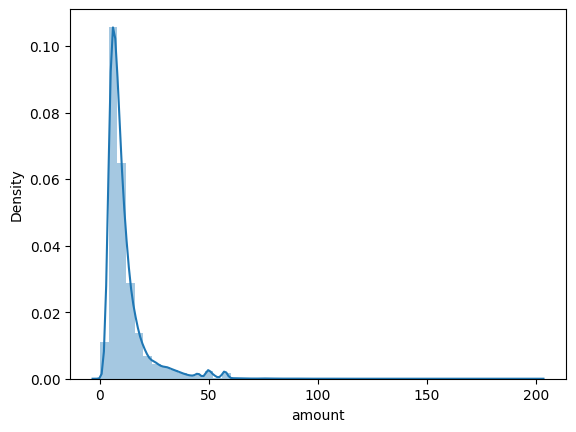

In [65]:
sns.distplot(df['amount'])
plt.show()

In [66]:
test_stat1, p1 = jarque_bera(np.log(df['amount']))
print(p1)

0.0


In [67]:
test_stat2, p2 = jarque_bera(np.sqrt(df['amount']))
print(p2)

0.0


In [68]:
test_stat3, p3 = jarque_bera(df['amount']**2)
print(p3)

0.0


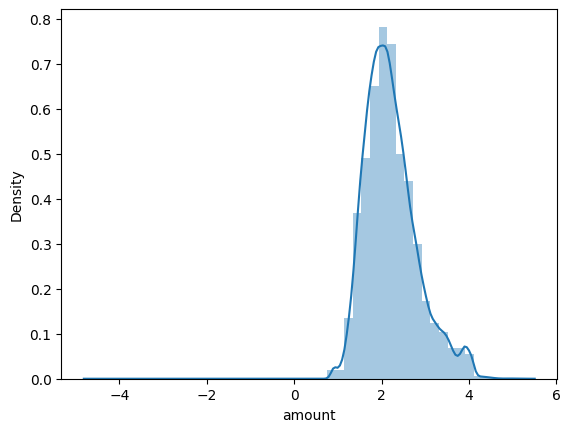

In [69]:
sns.distplot(np.log(df['amount']))
plt.show()

In [70]:
from scipy.stats import boxcox

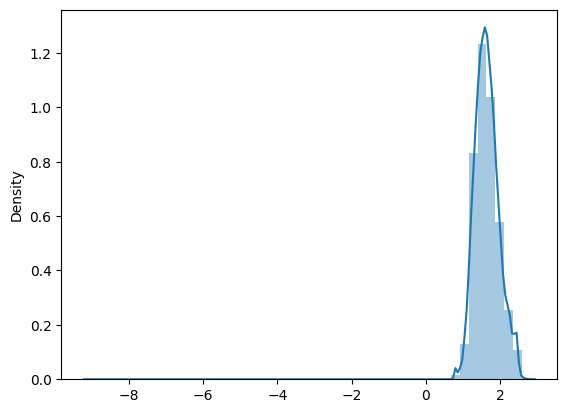

In [71]:
new_amt, alpha  = boxcox(df['amount'])
sns.distplot(new_amt)
plt.show()

In [72]:
print(alpha)

-0.26872584738895033


In [73]:
test_stat2, p2 = jarque_bera(new_amt)
print(p2)

0.0


#### Inverse of BoxCox

In [74]:
# yi_new = (yi^alpha - 1)/alpha, yi!=0
# yi_new = len(yi), yi=0

In [75]:
r = [1,2,3]
r_boxcox,lm = boxcox(r)
print(r_boxcox)
print(lm)

[0.         0.85236759 1.53407146]
0.5773965145064796


In [76]:
# (y_boxcox*lm + 1)  = yi^alpha
# yi = (y_boxcox*lm + 1)^(1/alpha)

In [77]:
r_org = (r_boxcox*lm +1)**(1/lm)
print(r_org)

[1. 2. 3.]


In [78]:
df[['lat_pickup','long_pickup','lat_drop','long_drop']].describe()

lat_pickup   long_pickup      lat_drop     long_drop
count  49825.000000  49825.000000  49825.000000  49825.000000
mean      39.926937    -72.510557     39.927448    -72.506896
std        6.011390     10.391455      6.011808     10.400148
min      -74.006893    -75.423848    -74.006377    -84.654241
25%       40.734890    -73.992066     40.734378    -73.991151
50%       40.752685    -73.981838     40.753375    -73.980087
75%       40.767363    -73.967145     40.768162    -73.963620
max       43.098708     40.783472     43.415190     40.851027

In [81]:
BB_pickup = (df['long_pickup'].min(),  df['long_pickup'].max(),      
              df['lat_pickup'].min(), df['lat_pickup'].max())
print(BB_pickup)               
BB_drop = (df['long_drop'].min(),  df['long_drop'].max(),      
              df['lat_drop'].min(), df['lat_drop'].max())
print(BB_drop)               

(-75.42384832, 40.783472, -74.006893, 43.098708)


In [82]:
BB_drop = (df['long_drop'].min(),  df['long_drop'].max(),      
              df['lat_drop'].min(), df['lat_drop'].max())
print(BB_drop)               

(-84.654241, 40.851027, -74.006377, 43.41519)


In [83]:
# BB = (-74.5, -72.8, 40.5, 41.8)
BB_new = (-80,-72,40,45)

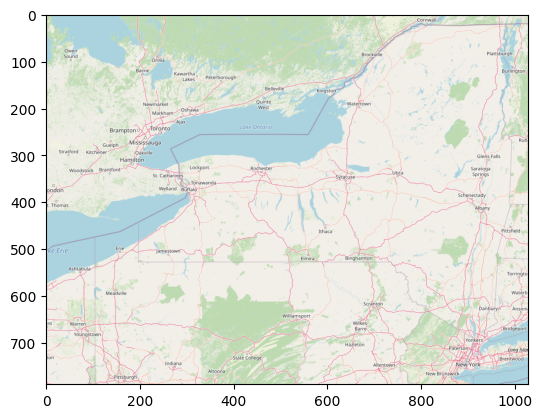

In [89]:
ny_map = plt.imread('ny_map_rf.png')
plt.imshow(ny_map)
plt.show()

In [90]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df['long_pickup'], df['lat_pickup'],
                   zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df['long_drop'], df['lat_drop']
                   , zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

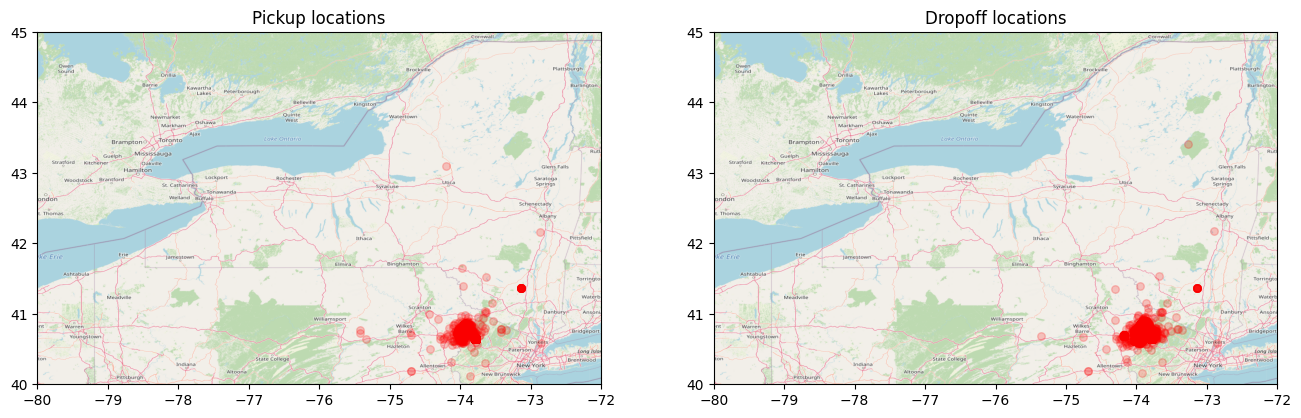

In [91]:
plot_on_map(df, BB_new, ny_map, s=30, alpha=0.2)

In [92]:
BB_new1 = (-75.7,-72.5,40,43.7)

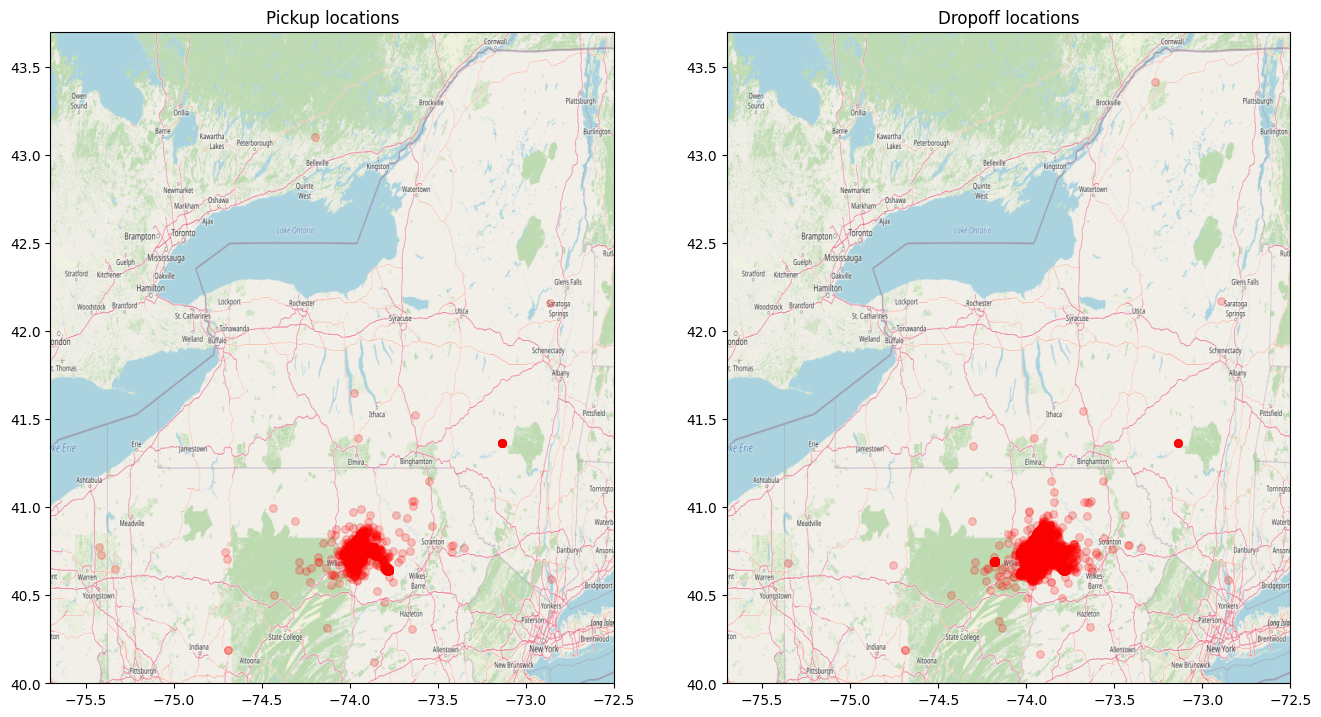

In [96]:
plot_on_map(df, BB_new1, ny_map, s=30, alpha=0.2)

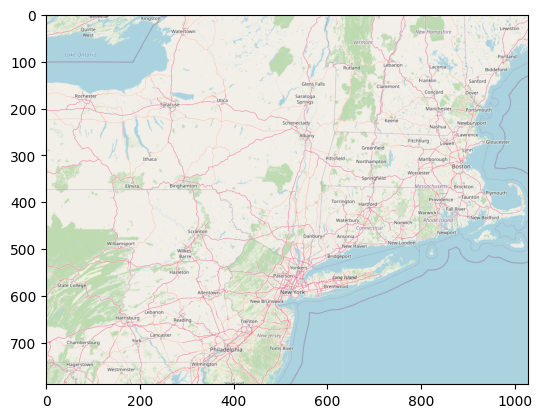

In [97]:
ny_map1 = plt.imread('ny_map_rf1.png')
plt.imshow(ny_map1)
plt.show()

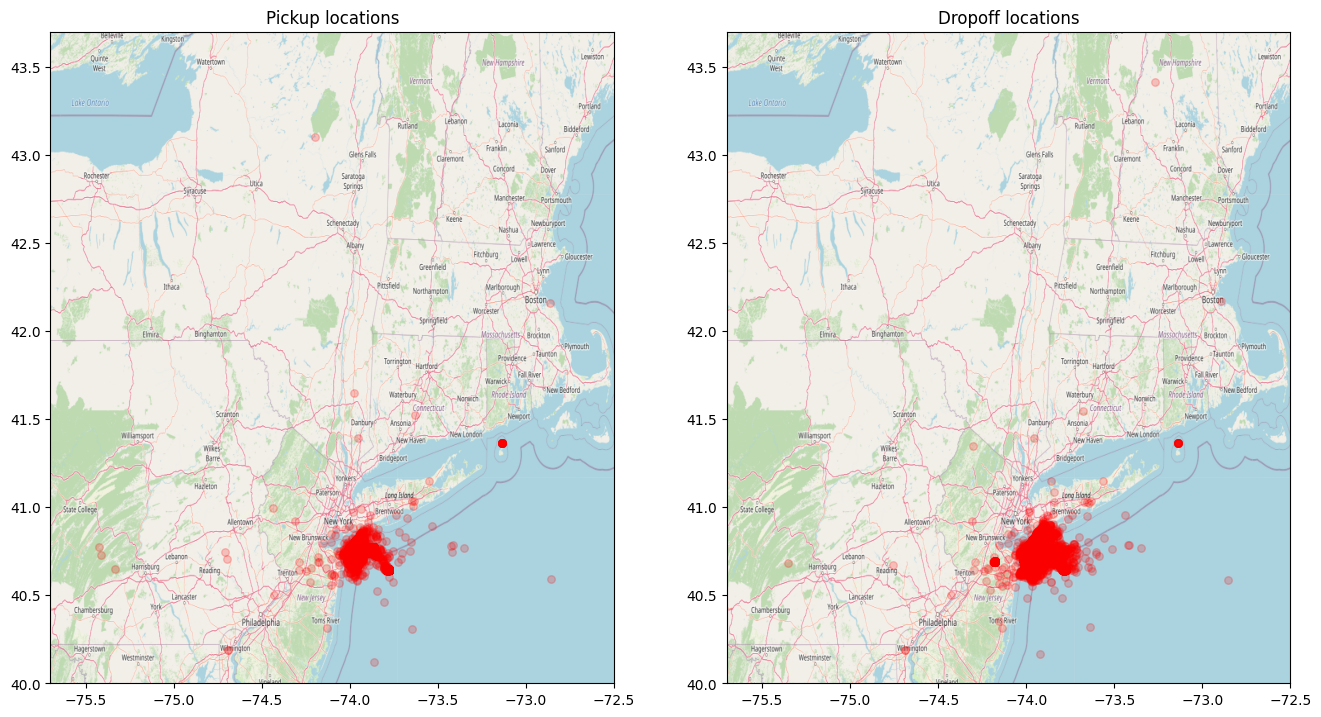

In [98]:
plot_on_map(df, BB_new1, ny_map1, s=30, alpha=0.2)

#### Certain Points are in Water

In [104]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count', 'Manhattan_dist',
       'Euclidean_dist', 'abs_lat_diff', 'abs_long_diff', 'Haversine_dist',
       'Year', 'Qtr', 'Month', 'Day', 'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')

#### Treat Outliers in Latitude and Longitude

In [139]:
a1 = df.iloc[:,3:8].describe(percentiles=[0.01,0.015,0.02,0.05,0.97,0.98,0.99,0.999]).T
a1 = a1.iloc[:,3:]
a1

min         1%       1.5%         2%         5%        50%  \
long_pickup -75.423848 -74.014445 -74.012035 -74.010464 -74.006819 -73.981838   
lat_pickup  -74.006893   0.000000   0.000000  40.583785  40.702190  40.752685   
long_drop   -84.654241 -74.015120 -74.013753 -74.011760 -74.007273 -73.980087   
lat_drop    -74.006377   0.000000   0.000000  40.572868  40.686191  40.753375   
pass_count    1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

                   97%        98%        99%      99.9%        max  
long_pickup -73.786896 -73.239712   0.000000   0.000000  40.783472  
lat_pickup   40.794314  40.799559  40.807074  40.865816  43.098708  
long_drop   -73.802166 -73.474126   0.000000   0.000000  40.851027  
lat_drop     40.804067  40.810229  40.832378  40.900508  43.415190  
pass_count    5.000000   5.000000   6.000000   6.000000   6.000000

In [116]:
print(df[df['long_pickup']> -73.239712].shape)
print(df[df['lat_pickup']< 40.583785].shape)
print(df[df['long_drop']> -73.474126].shape)
print(df[df['lat_drop']< 40.572868].shape)

(997, 20)
(997, 20)
(997, 20)
(997, 20)


In [140]:
df1  = df[(df['long_pickup']< -73.239712) & (df['lat_pickup']> 40.583785) & (df['long_drop']< -73.474126) & (df['lat_drop']> 40.572868)]
df1.shape

(48743, 20)

In [141]:
((50000-48743)/50000)*100

2.514

In [155]:
def plot_on_map_pick_drop(df, BB_pickup,BB_drop, nyc_pickup,nyc_drop, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df['long_pickup'], df['lat_pickup'],
                   zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB_pickup[0], BB_pickup[1]))
    axs[0].set_ylim((BB_pickup[2], BB_pickup[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_pickup, zorder=0, extent=BB_pickup)

    axs[1].scatter(df['long_drop'], df['lat_drop']
                   , zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB_drop[0], BB_drop[1]))
    axs[1].set_ylim((BB_drop[2], BB_drop[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_drop, zorder=0, extent=BB_drop)

In [156]:
BB_pickup1 = (df1['long_pickup'].min(),  df1['long_pickup'].max(),      
              df1['lat_pickup'].min(), df1['lat_pickup'].max())
print(BB_pickup1)               
BB_drop1 = (df1['long_drop'].min(),  df1['long_drop'].max(),      
              df1['lat_drop'].min(), df1['lat_drop'].max())
print(BB_drop1)               

(-75.42384832, -73.422692, 40.58761597, 41.65)
(-75.35455892, -73.513693, 40.574652, 41.543217)


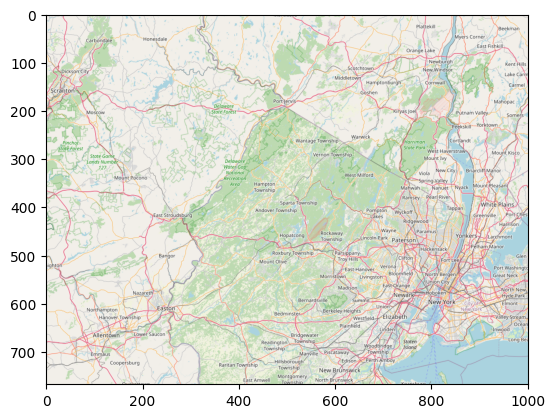

In [157]:
ny_map_pick = plt.imread('ny_map_pickup.png')
plt.imshow(ny_map_pick)
plt.show()

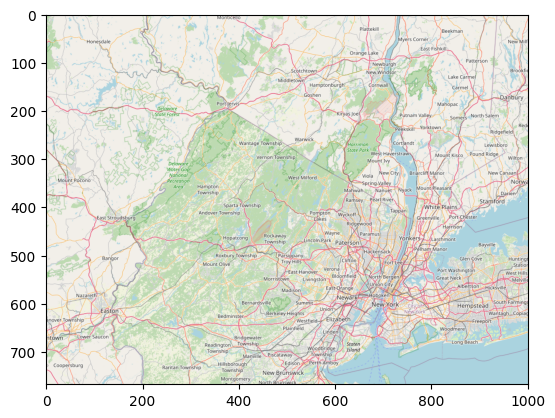

In [158]:
ny_map_drop = plt.imread('ny_map_drop.png')
plt.imshow(ny_map_drop)
plt.show()

In [159]:
print(min(df1['lat_pickup'].min(), df1['lat_drop'].min() ))
print(max(df1['lat_pickup'].max(), df1['lat_drop'].max()))

40.574652
41.65


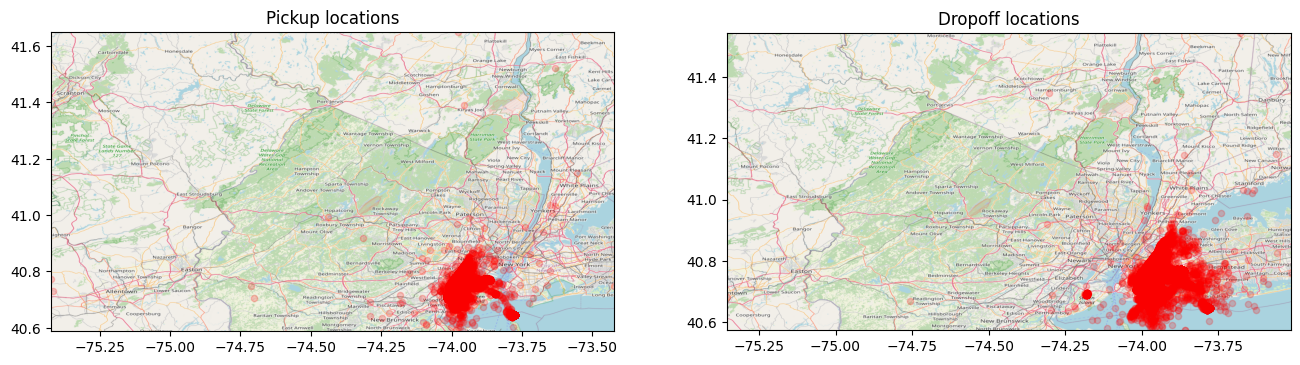

In [161]:
plot_on_map_pick_drop(df1, BB_pickup1,BB_drop1, ny_map_pick,ny_map_drop, s=20, alpha=0.2)

#### Outlier Treatment

In [169]:
a = df1.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99,0.999]).T
a = a.iloc[:,3:]
a

min           1%           2%           3%  \
amount             0.010000     3.300000     3.700000     3.700000   
long_pickup      -75.423848   -74.014440   -74.010505   -74.008781   
lat_pickup        40.587616    40.645409    40.680637    40.701724   
long_drop        -75.354559   -74.015117   -74.011803   -74.009891   
lat_drop          40.574652    40.646849    40.672449    40.685532   
pass_count         1.000000     1.000000     1.000000     1.000000   
Manhattan_dist     0.000000     0.000000     0.002764     0.005124   
Euclidean_dist     0.000000     0.000000     0.002253     0.004116   
abs_lat_diff       0.000000     0.000000     0.000195     0.000533   
abs_long_diff      0.000000     0.000000     0.000149     0.000394   
Haversine_dist     0.000000     0.000000     0.215686     0.404025   
Year            2009.000000  2009.000000  2009.000000  2009.000000   
Qtr                1.000000     1.000000     1.000000     1.000000   
Month              1.000000     1.000000     1.000000     1.000000   
Day                1.000000     1.000000     1.000000     1.000000   
Hour               0.000000     0.000000     0.000000     0.000000   
Hour_Qtr           1.000000     1.000000     1.000000     1.000000   
Is_Weekend         0.000000     0.000000     0.000000     0.000000   

                         5%          50%          95%          97%  \
amount             4.100000     8.500000    30.500000    38.225800   
long_pickup      -74.006878   -73.982128   -73.935239   -73.871119   
lat_pickup        40.709703    40.753448    40.787917    40.794394   
long_drop        -74.007349   -73.980498   -73.922791   -73.873095   
lat_drop          40.703276    40.754130    40.794407    40.804170   
pass_count         1.000000     1.000000     5.000000     5.000000   
Manhattan_dist     0.007242     0.028126     0.132156     0.177530   
Euclidean_dist     0.005775     0.021842     0.110941     0.138216   
abs_lat_diff       0.001208     0.014231     0.064491     0.082674   
abs_long_diff      0.000946     0.012782     0.097554     0.122230   
Haversine_dist     0.567674     2.161550    10.032568    13.069604   
Year            2009.000000  2012.000000  2015.000000  2015.000000   
Qtr                1.000000     2.000000     4.000000     4.000000   
Month              1.000000     6.000000    12.000000    12.000000   
Day                2.000000    16.000000    29.000000    30.000000   
Hour               1.000000    14.000000    22.000000    23.000000   
Hour_Qtr           1.000000     3.000000     4.000000     4.000000   
Is_Weekend         0.000000     0.000000     1.000000     1.000000   

                        98%          99%        99.9%          max  
amount            45.500000    52.000000    76.129000   200.000000  
long_pickup      -73.862842   -73.786812   -73.776699   -73.422692  
lat_pickup        40.799558    40.806871    40.848572    41.650000  
long_drop        -73.863792   -73.801458   -73.742901   -73.513693  
lat_drop          40.810346    40.832141    40.887840    41.543217  
pass_count         6.000000     6.000000     6.000000     6.000000  
Manhattan_dist     0.226368     0.299541     0.338393     1.469376  
Euclidean_dist     0.180981     0.223447     0.245051     1.451283  
abs_lat_diff       0.098444     0.115937     0.161005     0.868978  
abs_long_diff      0.155617     0.196036     0.226688     1.451169  
Haversine_dist    16.514845    20.400895    23.306280   122.359403  
Year            2015.000000  2015.000000  2015.000000  2015.000000  
Qtr                4.000000     4.000000     4.000000     4.000000  
Month             12.000000    12.000000    12.000000    12.000000  
Day               30.000000    31.000000    31.000000    31.000000  
Hour              23.000000    23.000000    23.000000    23.000000  
Hour_Qtr           4.000000     4.000000     4.000000     4.000000  
Is_Weekend         1.000000     1.000000     1.000000     1.000000

In [170]:
print(df[df['amount']>52].shape)
print(df[df['amount']>76.1290].shape)

(498, 20)
(57, 20)


In [171]:
df1['amount'] = np.where(df1['amount']>76.129,76.129,df1['amount'])
df1.head()

id  amount           pickup_datetime  long_pickup  lat_pickup  \
0  26:21.0     4.5 2009-06-15 17:26:21+00:00   -73.844311   40.721319   
1  52:16.0    16.9 2010-01-05 16:52:16+00:00   -74.016048   40.711303   
2  35:00.0     5.7 2011-08-18 00:35:00+00:00   -73.982738   40.761270   
3  30:42.0     7.7 2012-04-21 04:30:42+00:00   -73.987130   40.733143   
4  51:00.0     5.3 2010-03-09 07:51:00+00:00   -73.968095   40.768008   

   long_drop   lat_drop  pass_count  Manhattan_dist  Euclidean_dist  \
0 -73.841610  40.712278           1        0.011742        0.009436   
1 -73.979268  40.782004           1        0.107481        0.079696   
2 -73.991242  40.750562           2        0.019212        0.013674   
3 -73.991567  40.758092           1        0.029386        0.025340   
4 -73.956655  40.783762           1        0.027194        0.019470   

   abs_lat_diff  abs_long_diff  Haversine_dist  Year  Qtr  Month  Day  Hour  \
0      0.009041       0.002701        1.031896  2009    2      6   15    17   
1      0.070701       0.036780        8.459416  2010    1      1    5    16   
2      0.010708       0.008504        1.391052  2011    3      8   18     0   
3      0.024949       0.004437        2.802346  2012    2      4   21     4   
4      0.015754       0.011440        2.001353  2010    1      3    9     7   

   Hour_Qtr  Is_Weekend  
0         3           0  
1         3           0  
2         4           0  
3         1           1  
4         2           0

In [186]:
print(df1[df1['Manhattan_dist']<0.002764].shape)
print(df1[df1['Euclidean_dist']<0.002253].shape)
print(df1[df1['abs_lat_diff']<0.000195].shape)
print(df1[df1['abs_long_diff']<0.000149].shape)
print(df1[df1['Haversine_dist']<0.215686].shape)
print(df1[df1['Haversine_dist']>24].shape)

(975, 20)
(975, 20)
(978, 20)
(977, 20)
(975, 20)
(36, 20)


#### Select x and y

In [178]:
df1.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count', 'Manhattan_dist',
       'Euclidean_dist', 'abs_lat_diff', 'abs_long_diff', 'Haversine_dist',
       'Year', 'Qtr', 'Month', 'Day', 'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')

In [185]:
x = df1.drop(['id','pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop','amount'],axis=1)
y = df1['amount']  # new_amt
print(x.columns)
print(x.shape)
print(y.shape)

Index(['pass_count', 'Manhattan_dist', 'Euclidean_dist', 'abs_lat_diff',
       'abs_long_diff', 'Haversine_dist', 'Year', 'Qtr', 'Month', 'Day',
       'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')
(48743, 13)
(48743,)


In [187]:
from sklearn.model_selection import train_test_split # for data splitting

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36557, 13)
(12186, 13)
(36557,)
(12186,)


In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [218]:
print('Train Scr',lr1.score(x_train,y_train))
print('Test Scr',lr1.score(x_test,y_test))

Train Scr 0.7575383103717112
Test Scr 0.7541899137096222


In [219]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(36557, 13)
(12186, 13)
(36557,)
(12186,)


In [230]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [231]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    mse_train = mean_squared_error(y_train,ypred_train)
    mse_test = mean_squared_error(y_test,ypred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train,ypred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test,ypred_test))
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('MSE_train',mse_train)
    print('MSE_test',mse_test)
    print('RMSE_train',rmse_train)
    print('RMSE_test',rmse_test)
    print('Train_scr',train_scr)
    print('Test_scr',test_scr)

In [227]:
from sklearn.ensemble import RandomForestRegressor

In [232]:
rf_base = RandomForestRegressor()
eval_model(rf_base,x_train1,x_test1,y_train1,y_test1)

MSE_train 2.2797969768660757
MSE_test 15.383684230753733
RMSE_train 1.5098996578799784
RMSE_test 3.9222040016747894
Train_scr 0.9745647325580442
Test_scr 0.8128792308966998


In [233]:
fimp1 = pd.DataFrame({'Features':x_train1.columns,'Imp':rf_base.feature_importances_})
fimp1 = fimp1.sort_values('Imp',ascending=False)
fimp1

Features       Imp
2   Euclidean_dist  0.802589
6             Year  0.028426
4    abs_long_diff  0.028311
5   Haversine_dist  0.024681
3     abs_lat_diff  0.024514
1   Manhattan_dist  0.022186
10            Hour  0.020620
9              Day  0.018796
8            Month  0.013781
11        Hour_Qtr  0.004664
0       pass_count  0.004639
7              Qtr  0.003606
12      Is_Weekend  0.003186

In [234]:
sig_feat = fimp1.nlargest(11,columns='Imp')['Features'].values
sig_feat

array(['Euclidean_dist', 'Year', 'abs_long_diff', 'Haversine_dist',
       'abs_lat_diff', 'Manhattan_dist', 'Hour', 'Day', 'Month',
       'Hour_Qtr', 'pass_count'], dtype=object)

In [241]:
x2 = df1[sig_feat]
y2 = df1['amount']
print(x2.shape)
print(y2.shape)

(48743, 11)
(48743,)


In [242]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.25,random_state=25)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(36557, 11)
(12186, 11)
(36557,)
(12186,)


In [238]:
rf2 = RandomForestRegressor(n_estimators=90,max_depth=9,
                            min_samples_split=30,n_jobs=-1)

eval_model(rf2,x_train2,x_test2,y_train2,y_test2)

MSE_train 12.063335854312202
MSE_test 14.544549578186253
RMSE_train 3.4732313274978104
RMSE_test 3.81373171292715
Train_scr 0.8654116235743259
Test_scr 0.8230861175705537


In [239]:
print('Train Score',rf2.score(x_train2,y_train2))
print('Test Score',rf2.score(x_test2,y_test2))

Train Score 0.8654116235743259
Test Score 0.8230861175705537


In [246]:
rf3 = RandomForestRegressor(n_estimators=80,min_samples_split=7)
rf3.fit(x_train2,y_train2)
print('Train Score',rf3.score(x_train2,y_train2))
print('Test Score',rf3.score(x_test2,y_test2))

Train Score 0.9472126291788902
Test Score 0.815432895593639


#### Parameter Tuning

In [244]:
from sklearn.model_selection import RandomizedSearchCV

In [252]:
hparams_rf = {'n_estimators':[70,75,80,85,90,95,100],
             'max_depth':[10,15,20],
             'min_samples_split':[10,15,20]}

In [253]:
rf_est = RandomForestRegressor()
rs1 = RandomizedSearchCV(rf_est,param_distributions=hparams_rf,
                         cv=5,scoring='neg_mean_squared_error')
rs1.fit(x_train2,y_train2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 15, 20],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [70, 75, 80, 85, 90, 95,
                                                         100]},
                   scoring='neg_mean_squared_error')

In [257]:
print(rs1.best_score_)
print(rs1.best_params_)

-15.938980895669005
{'n_estimators': 75, 'min_samples_split': 20, 'max_depth': 10}


#### Final Model

In [258]:
rf_final = RandomForestRegressor(**rs1.best_params_)
eval_model(rf_final,x_train2,x_test2,y_train2,y_test2)

MSE_train 10.785458608299667
MSE_test 14.612227038844072
RMSE_train 3.284122197528537
RMSE_test 3.8225942812236915
Train_scr 0.8796686604245981
Test_scr 0.8222629169445338
